# Hacker News Commenting Analyisis

## Objective of this analysis

 - To find which are the types of posts that receive the most comments, the analysis have been narrowed down into only two types of posts, **Ask HN** or **Show HN**.
 - This analyisis will also try to find first if the posts that were created in certain time receives more comments on average.
 

### Guideline of the analysis
1. Import all the basic libraries that will be needed to do different tasks in the project.
 - Starting with the ones that are needed imediately and others will be added as we go
2. Load the data set and perform initial analysis 
 - df.head()--> to show what the dataset look like
 - df.info()--> to show more details on how the columns look like
 - df.describe()---> to have some statistical OVV of the relevant columns

3. Filter the dataset to remain with only the ASK HN or Show HN
  - Create an empty list, this will be used to collect information about each row
  - Using iterrows move from one row to the other(this is the fastest way to do)
  - On each row
      - Convert the title into list of characters
      - Extract three first charactes of each title **this is enough for us to make a conclusion if a title is what we want**
      - Join the three characters into a word and then
      - Using **if ....else statement
          - Check if the word is Sho if yes then add a value 'ASK-SHOW' into the empty list created above
          - check if the word is Ask if yes then add a value 'ASK-SHOW' into the empty list created above
          - if the word is anything else then add a value 'NOT' into the empty list created above
      - assign the new empty list to the new column 'ASK/SHOW'
      


In [1]:
#import the libraries neede

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from datetime import *
import numpy as np
import time 

In [2]:
#load the dataset
hn_raw_data = pd.read_csv('hacker_news.csv')

In [3]:
#looking at the data to understand what it look like
hn_raw_data.head(10)

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
4,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12
5,10482257,Title II kills investment? Comcast and other I...,http://arstechnica.com/business/2015/10/comcas...,53,22,Deinos,10/31/2015 9:48
6,10557283,Nuts and Bolts Business Advice,NaN,3,4,shomberj,11/13/2015 0:45
7,12296411,Ask HN: How to improve my personal website?,NaN,2,6,ahmedbaracat,8/16/2016 9:55
8,11337617,"Shims, Jigs and Other Woodworking Concepts to ...",http://firstround.com/review/shims-jigs-and-ot...,34,7,zt,3/22/2016 16:18
9,10379326,That self-appendectomy,http://www.southpolestation.com/trivia/igy1/ap...,91,10,jimsojim,10/13/2015 9:30


In [4]:
#get an idea of what are the summaries of all the columns
hn_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20100 entries, 0 to 20099
Data columns (total 7 columns):
id              20100 non-null int64
title           20100 non-null object
url             17660 non-null object
num_points      20100 non-null int64
num_comments    20100 non-null int64
author          20100 non-null object
created_at      20100 non-null object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


#### Missing data in the 'Url' column
 - From the df.info() above it can be observed that in the url column has some of it raws with NaN value
 - It should be decided how we deal with this
     - From the quick look, this column is not directly related to the analysis ie the analysis does not need the urls.
     - **For now this problem will be ignored!**

In [5]:
#getting more information on the numerical columns 
hn_raw_data.describe()

,id,num_points,num_comments
count,2.010000e+04,20100.000000,20100.000000
mean,1.131753e+07,50.296070,24.802289
std,6.964399e+05,107.107687,56.107340
min,1.017691e+07,1.000000,1.000000
25%,1.070176e+07,3.000000,1.000000
50%,1.128445e+07,9.000000,3.000000
75%,1.192607e+07,54.000000,21.000000
max,1.257898e+07,2553.000000,1733.000000


#### From the describe funtion above, few points can be seen
- There are 20100 rows in the dataset
- The highest number of points on a post is 2553
- The lowest number of poits a post has is 1
- The highets number of comments on a post is 1733
- The lowest number of comments on a post is 1


In [6]:
#I am creating a new column and assign it with a value which will help me filter titles into three categories
# Those that are not ask/show, the ones that are show and the ones that are Ask
ask_show = []
for index,row in hn_raw_data.iterrows():
    list1 = list(row['title'])
    first_3_char = list1[:3]
    first_word = ''.join(first_3_char)
    if first_word == 'Sho':
        ask_show.append('SHOW')
        
    elif first_word == 'Ask':
        ask_show.append('ASK')
    else:
        ask_show.append('NOT')
hn_raw_data['ASK/SHOW'] = ask_show

In [7]:
#checking if the changes made above made it to the dataset---> worthy making sure that the changes valid
hn_raw_data

,id,title,url,num_points,num_comments,author,created_at,ASK/SHOW
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52,NOT
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30,NOT
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20,NOT
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01,NOT
4,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12,NOT
...,...,...,...,...,...,...,...,...
20095,12379592,How Purism Avoids Intels Active Management Tec...,https://puri.sm/philosophy/how-purism-avoids-i...,10,6,AdmiralAsshat,8/29/2016 2:22,NOT
20096,10339284,YC Application Translated and Broken Down,https://medium.com/@zreitano/the-yc-applicatio...,4,1,zreitano,10/6/2015 14:57,NOT
20097,10824382,Microkernels are slow and Elvis didn't do no d...,http://blog.darknedgy.net/technology/2016/01/0...,169,132,vezzy-fnord,1/2/2016 0:49,NOT
20098,10739875,How Product Hunt really works,https://medium.com/@benjiwheeler/how-product-h...,695,222,brw12,12/15/2015 19:32,NOT


In [8]:
#separate the two datasets that meet our interested criteria and asign them into separate datasets
hn_ask_data = hn_raw_data[hn_raw_data['ASK/SHOW'] == 'ASK']
hn_show_data = hn_raw_data[hn_raw_data['ASK/SHOW'] == 'SHOW']

In [9]:
#sort the data set by number of comments
hn_ask_sorted_data = hn_ask_data.sort_values(by = ['num_comments'],ascending=False)
hn_show_sorted_data = hn_show_data.sort_values(by = ['num_comments'],ascending=False)

In [10]:
#convert the column containing date into a date time object to enable manipulation
hn_ask_sorted_data['created_at'] = pd.to_datetime(hn_ask_sorted_data['created_at'])
hn_show_sorted_data['created_at'] = pd.to_datetime(hn_show_sorted_data['created_at'])

In [11]:
dates_ask_200 = hn_ask_sorted_data['created_at'][hn_ask_sorted_data['num_comments'] >200] 
dates_show_100 = hn_show_sorted_data['created_at'][hn_show_sorted_data['num_comments'] >100]

In [16]:
#this function will enable plotting of the events vs time to be easy to comprehend
def convert_datetime_to_sec(time_dt):
    hour= time_dt.hour
    minute = time_dt.minute
    seconds = time_dt.second
    
    total_time = hour * 60 * 60 + minute * 60 + seconds
    
    return total_time
    

In [13]:
assert convert_datetime_to_sec(time(0,0,0))== 0
assert convert_datetime_to_sec(time(1,0,0))== 3600

TypeError: 'module' object is not callable

In [17]:
#drop the date and remain with only time on the created_at to be used 
hn_ask_sorted_data['time_sec'] = (hn_ask_sorted_data['created_at'].dt.time).apply(convert_datetime_to_sec)
hn_show_sorted_data['time_sec'] = (hn_show_sorted_data['created_at'].dt.time).apply(convert_datetime_to_sec)

In [20]:
pd.set_option('display.max_rows', None)
hn_show_sorted_data

,id,title,url,num_points,num_comments,author,created_at,ASK/SHOW,time_sec
11256,11639775,Should Prostitution Be a Crime?,http://www.nytimes.com/2016/05/08/magazine/sho...,164,314,jseliger,2016-05-05 21:25:00,SHOW,77100
14485,11279903,Should All Research Papers Be Free?,http://www.nytimes.com/2016/03/13/opinion/sund...,644,309,mirimir,2016-03-13 23:15:00,SHOW,83700
7084,11667494,Show HN: BitKeeper Enterprise-ready version c...,https://www.bitkeeper.org/,384,306,wscott,2016-05-10 14:39:00,SHOW,52740
16193,11778077,Show HN: Automatic private time tracking for OS X,https://qotoqot.com/qbserve/,429,233,ivm,2016-05-26 14:12:00,SHOW,51120
17285,11407536,Show HN: What every browser knows about you,http://webkay.robinlinus.com/,553,206,Capira,2016-04-01 18:55:00,SHOW,68100
9836,11846108,Show HN: New calendar app idea,http://www.oneviewcalendar.com,825,197,petermolyneux,2016-06-06 12:02:00,SHOW,43320
4051,10849460,Show HN: Nodal. Next-Generation Node.js Server...,http://www.nodaljs.com/,288,168,keithwhor,2016-01-06 09:20:00,SHOW,33600
18809,12211754,Show HN: Noms A new decentralized database ba...,https://medium.com/@aboodman/noms-init-98b7f0c...,508,167,ahl,2016-08-02 17:57:00,SHOW,64620
10054,10248773,Show HN: Hacker News Simulator,http://news.ycombniator.com/,572,163,orf,2015-09-20 19:50:00,SHOW,71400
13073,11354021,Show HN: Watch movies with the freedom to filter,https://github.com/delight-im/MovieContentFilt...,125,143,marco1,2016-03-24 16:16:00,SHOW,58560


#### Plotting some graphs from the data
 - Number of comments and Number of posts with focus on ASK and SHOW posts
 - SHOW posts with focus on the time that the posts were posted vs the number of comments
 - ASK posts with focus on the time that the posts were posted vs the number of comments

In [21]:
no_show_titles = len(hn_show_sorted_data)
no_ask_titles = len(hn_ask_sorted_data)

In [22]:
total_comments_show = hn_show_sorted_data['num_comments'].sum()
total_comments_ask = hn_ask_sorted_data['num_comments'].sum()

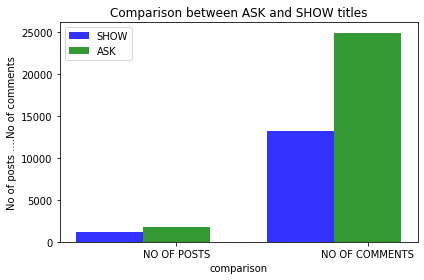

In [23]:

# data to plot
n_groups = 2
show= (no_show_titles,total_comments_show)
ask = (no_ask_titles,total_comments_ask)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, show, bar_width,
alpha=opacity,
color='b',
label='SHOW')

rects2 = plt.bar(index + bar_width, ask, bar_width,
alpha=opacity,
color='g',
label='ASK')

plt.xlabel('comparison')
plt.ylabel('No of posts ....No of comments')
plt.title('Comparison between ASK and SHOW titles')
plt.xticks(index + bar_width, ('NO OF POSTS', 'NO OF COMMENTS'))
plt.legend()

plt.tight_layout()
plt.show()

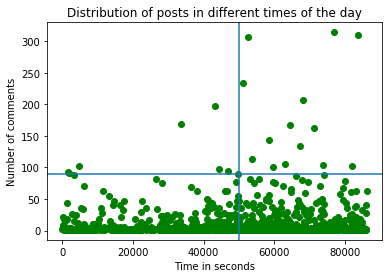

In [36]:
#plot SHOW posts comments vs time(in seconds)
plt.scatter(hn_show_sorted_data['time_sec'],hn_show_sorted_data['num_comments'], marker = 'o', color = 'g')
plt.title('Distribution of posts in different times of the day')
plt.xlabel('Time in seconds')
plt.ylabel('Number of comments')
plt.axvline(x=50000)
plt.axhline(y=90)
plt.show()

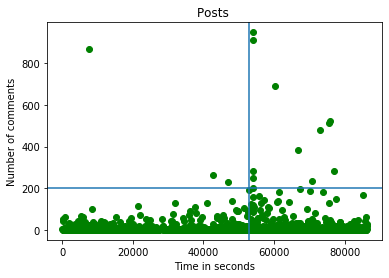

In [38]:
plt.scatter(hn_ask_sorted_data['time_sec'],hn_ask_sorted_data['num_comments'], marker = 'o', color = 'g')
plt.title('Posts ')
plt.xlabel('Time in seconds')
plt.ylabel('Number of comments')
plt.axvline(x=53000)
plt.axhline(y=200)
plt.show()

In [56]:
#take time in seconds
#obtanin hour time by
#take the reminder and convert to minutes
#return the time in hours and time in minutes
def convert_sec_to_hours(seconds):
    hours = seconds//3600
    reminder = seconds%3600
    minutes = reminder//60
    return hours, minutes

In [57]:
convert_sec_to_hours(50000)

(13, 53)

In [47]:
delta = 53000/3600
delta

14.722222222222221

In [55]:
a = 53000%3600
b = 53000//3600
a = a//60
print(a,b)

43 14


I want to plot the two celll above in one graph which will bundle up comments and titles back to back
Plot groups of time vs number of comments